In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
sns.set()

### Visualise the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head() #Check the data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0.17% of the dataset is fraud which is 492 out of 284315


<Figure size 432x288 with 0 Axes>

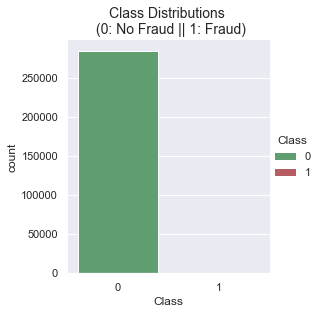

In [4]:
plt.figure(figsize=(6, 4))
sns.catplot(x='Class', kind='count', data=df, hue='Class', palette=["g", "r"], height =4)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14,)
print(f"{round(df['Class'].value_counts()[1] / len(df) * 100, 2)}% of the dataset is fraud which is {round(df['Class'].value_counts()[1], 2)} out of {round(df['Class'].value_counts()[0], 2)}")


#### We can see that the dataset is highly unbalanced with very few fraud cases (class ="1")

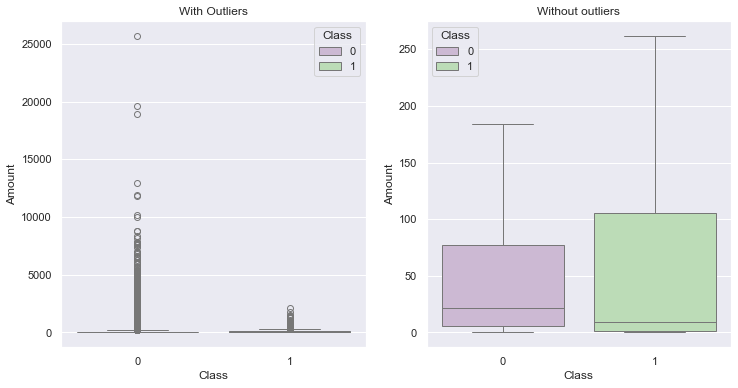

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
ax1.set_title('With Outliers')
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
ax2.set_title('Without outliers')
plt.show()

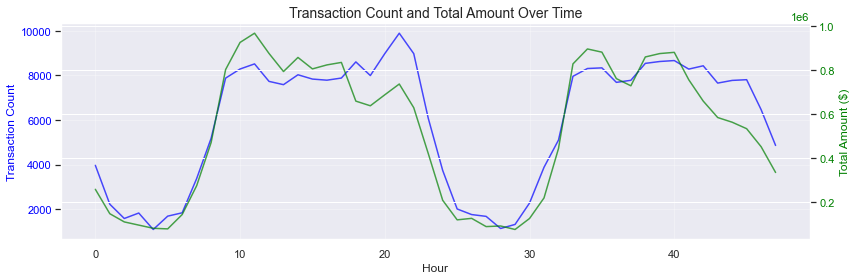

In [6]:
df['Hour'] = (df['Time'] // 3600).astype(int)  # Convert seconds to hours

# Aggregate by hour
hourly_data = df.groupby('Hour').agg({'Amount': 'sum', 'Time': 'count'}).rename(columns={'Time': 'Transaction_Count'})

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot the transaction count
ax1.set_title("Transaction Count and Total Amount Over Time", fontsize=14)
ax1.plot(hourly_data.index, hourly_data['Transaction_Count'], color='blue', label='Transaction Count', alpha=0.7)
ax1.set_xlabel("Hour")
ax1.set_ylabel("Transaction Count", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add a secondary axis for the total amount
ax2 = ax1.twinx()
ax2.plot(hourly_data.index, hourly_data['Amount'], color='green', label='Total Amount', alpha=0.7)
ax2.set_ylabel("Total Amount ($)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show grid and legend
ax1.grid(visible=True, alpha=0.3)
fig.tight_layout()

plt.show()

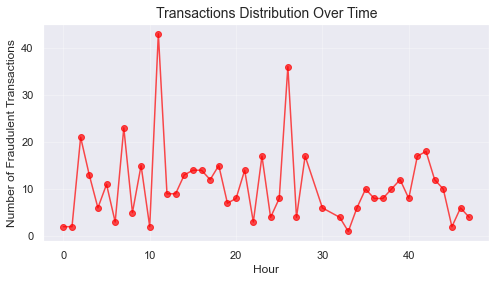

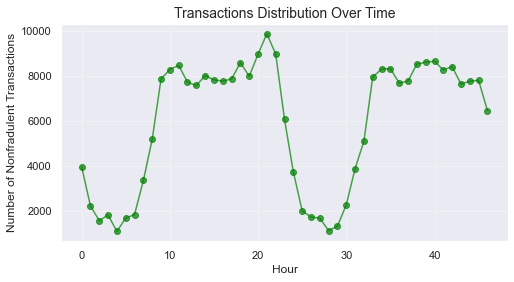

In [7]:
# For fraud data
fraud_data = df[df['Class'] == 1]

# Transactions by hour
fraud_hourly = fraud_data.groupby('Hour').size()
all_hours = pd.RangeIndex(start=fraud_hourly.index.min(), stop=fraud_hourly.index.max())


# Plot the fraud distribution over time
plt.figure(figsize=(8, 4))
plt.plot(fraud_hourly.index, fraud_hourly, marker='o', linestyle='-', color='red', alpha=0.7)
plt.title("Transactions Distribution Over Time", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Number of Fraudulent Transactions")
plt.grid(visible=True, alpha=0.3)
plt.show()

# For nonfraud data
nonfraud_data = df[df['Class'] == 0]
nonfraud_hourly = nonfraud_data.groupby('Hour').size()
nonfraud_hourly = nonfraud_hourly.reindex(all_hours, fill_value=0)

# Plot the fraud distribution over time
plt.figure(figsize=(8,4))
plt.plot(nonfraud_hourly.index, nonfraud_hourly, marker='o', linestyle='-', color='green', alpha=0.7)
plt.title("Transactions Distribution Over Time", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Number of Nonfradulent Transactions")
plt.grid(visible=True, alpha=0.3)
plt.show()

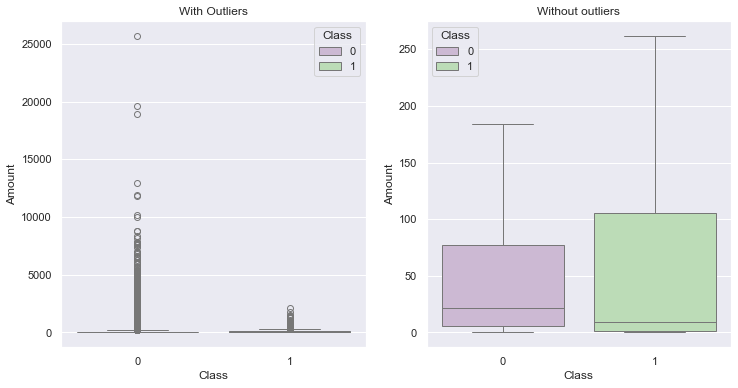

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
ax1.set_title('With Outliers')
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
ax2.set_title('Without outliers')
plt.show()

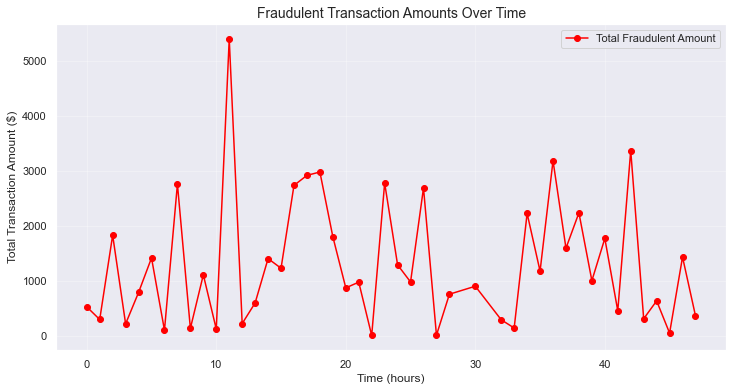

In [10]:
# Ensure 'Hour' is correctly set up for aggregation
fraud_amounts = fraud_data.groupby('Hour')['Amount'].sum()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(fraud_amounts.index, fraud_amounts.values, marker='o', color='red', label='Total Fraudulent Amount')
plt.title("Fraudulent Transaction Amounts Over Time", fontsize=14)
plt.xlabel("Time (hours)")
plt.ylabel("Total Transaction Amount ($)")
plt.grid(visible=True, alpha=0.3)
plt.legend()
plt.show()


### Correlations in the data

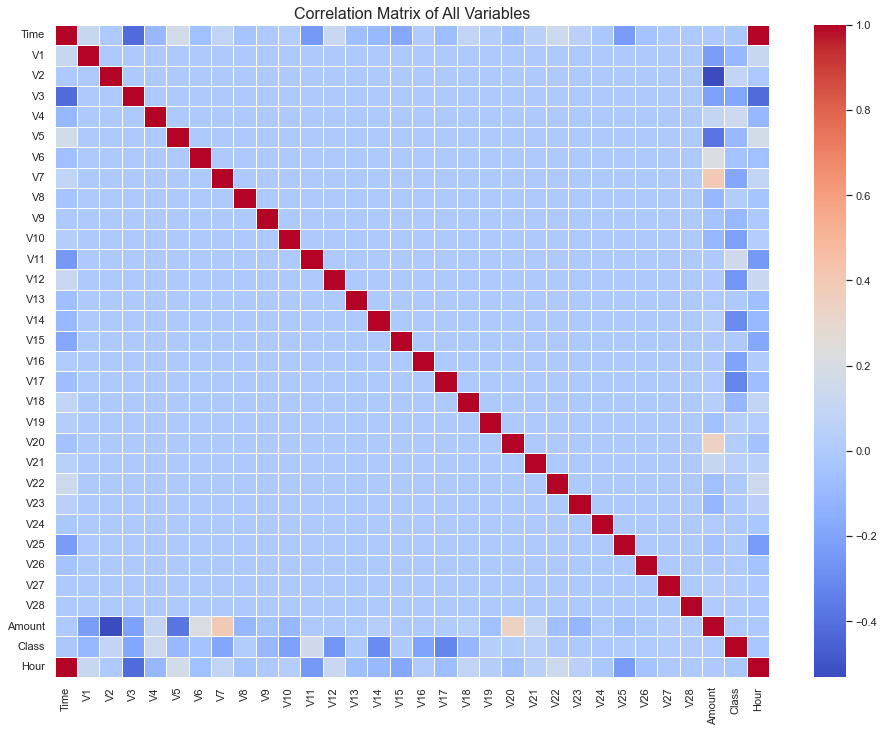

In [9]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Variables', fontsize=16)
plt.show()

#see that there is not much correlation as dataset is inbalance

In [10]:
#shuffle the entire dataset
df = df.sample(frac=1)

# there are 492 fraud cases, extract the same number of nonfraud case.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
168084,119059.0,-0.277368,1.035290,-1.044173,-0.252424,0.685146,-0.833644,0.519564,0.255929,-0.416037,...,1.086733,-0.024642,-0.532779,-0.302089,-0.148600,-0.108654,-0.000700,15.00,0,33
89190,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1,17
213164,139138.0,-1.501935,0.152528,-0.402489,-0.517292,1.188054,-0.569090,1.333537,-0.372252,0.300124,...,-0.197274,0.539449,0.391482,0.029491,-0.131712,0.049771,0.078667,100.00,0,38
214662,139767.0,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,...,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1,38
151103,94625.0,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,1.008471,...,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,33.76,1,26


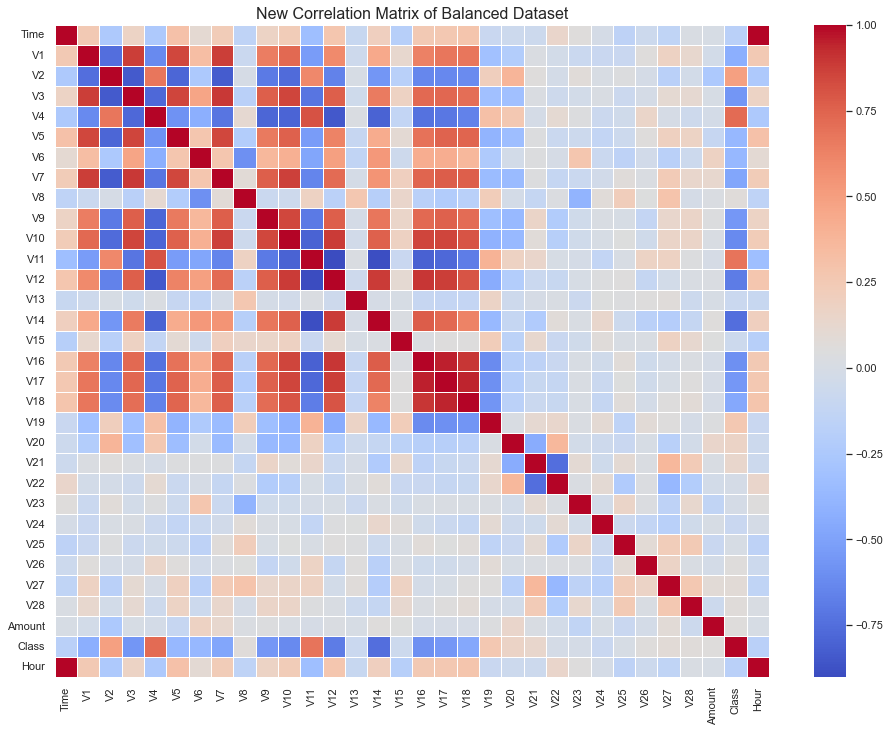

In [11]:
plt.figure(figsize=(16, 12))
new_correlation_matrix = new_df.corr()
sns.heatmap(new_correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('New Correlation Matrix of Balanced Dataset', fontsize=16)
plt.show()
#More correlations after balancing the data

In [12]:
#scale the data

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

#insert at the start of df
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
37329,4.480542,-0.537859,0.598308,-1.574005,0.373374,-1.188479,-1.349257,-0.252785,-0.243656,-0.047330,...,0.362656,0.569194,-0.471663,0.136110,0.417328,0.076875,-0.014808,0.071544,0,10
72564,0.277370,-0.351637,1.346919,-0.635865,0.045014,-0.809943,-0.834004,-0.672770,-0.506687,-0.068136,...,0.248348,0.498568,-0.181559,0.018054,0.598928,-0.113432,-0.022914,0.000119,0,15
88877,0.351848,-0.262703,-0.131863,-0.483569,1.780176,-2.684060,-1.011163,0.197954,-0.919284,-0.672107,...,0.452406,-0.619968,-0.560481,-0.335298,1.543748,-0.635747,0.172008,0.154905,0,17
268255,-0.167819,0.921533,-0.996995,0.771113,1.636672,-0.540818,0.738372,0.490579,0.461974,0.012542,...,-0.242200,-0.604436,-0.127623,0.064517,0.354560,0.173715,-0.182942,0.041187,0,45
276984,1.075945,0.971604,1.975411,-1.235827,-0.627515,-0.885571,-1.038893,-0.312646,-0.917611,-0.064320,...,0.415736,1.100826,-0.002486,-0.270574,-0.141400,-0.099549,-0.004575,-0.044354,0,46


In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

#Split the data such that proportion of fraudulent and nonfraudulent are the same.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
#convert to numpy arrays required in the models
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#check proportion of fraudulent and nonfradulent are similar in test and train
train_counts_label = np.unique(original_ytrain, return_counts=True)
test_counts_label = np.unique(original_ytest, return_counts=True)
print(train_counts_label[1] / len(original_ytrain))
print(test_counts_label[1] / len(original_ytest))

Train: [ 56958  56959  56960 ... 284804 284805 284806] Test: [    0     1     2 ... 57697 58460 58656]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56958  56959  56960 ... 116601 116844 117918]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113914 113915 113916 ... 173040 173282 174500]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170877 170878 170879 ... 234059 234672 235046]
Train: [     0      1      2 ... 234059 234672 235046] Test: [227837 227838 227839 ... 284804 284805 284806]
[0.99827076 0.00172924]
[0.99827952 0.00172048]
